# Interactions between Dolphins
## Andrew Dean

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [44]:
Dolphins = nx.read_gml('dolphins.gml')
Dolphins_G = nx.to_networkx_graph(Dolphins)

# What are the nodes?
The nodes are individual mixed-sex bottlenose dolphins. There are 62 nodes in this network. 

In [22]:
# Finding number of nodes in network
N = len(Dolphins)
print(N)

62


# What are the edges?
The edges are the frequency of interactions, or association, that one dolphin has with another. There are 159 edges in this network.

In [23]:
# Finding number of edges in network
print(Dolphins_G.number_of_edges())

159


# Is it weighted or unweighted?
Unweighted

In [39]:
Dolphins_W = np.load('dolphins.npy')
print(Dolphins_W)
Dolphins_W1 = nx.to_networkx_graph(Dolphins_W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [24]:
# Find the most central node(s)
a = nx.degree_centrality(Dolphins_G)
d = nx.closeness_centrality(Dolphins_G)
b = nx.eigenvector_centrality(Dolphins_G)
c = nx.betweenness_centrality(Dolphins_G)

print('The person with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The person with highest closeness centrality is', max(d, key=lambda key: d[key]))
print('The person with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The person with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The person with highest degree centrality is Grin
The person with highest closeness centrality is SN100
The person with highest eigenvector centrality is Grin
The person with highest betweenness centrality is SN100


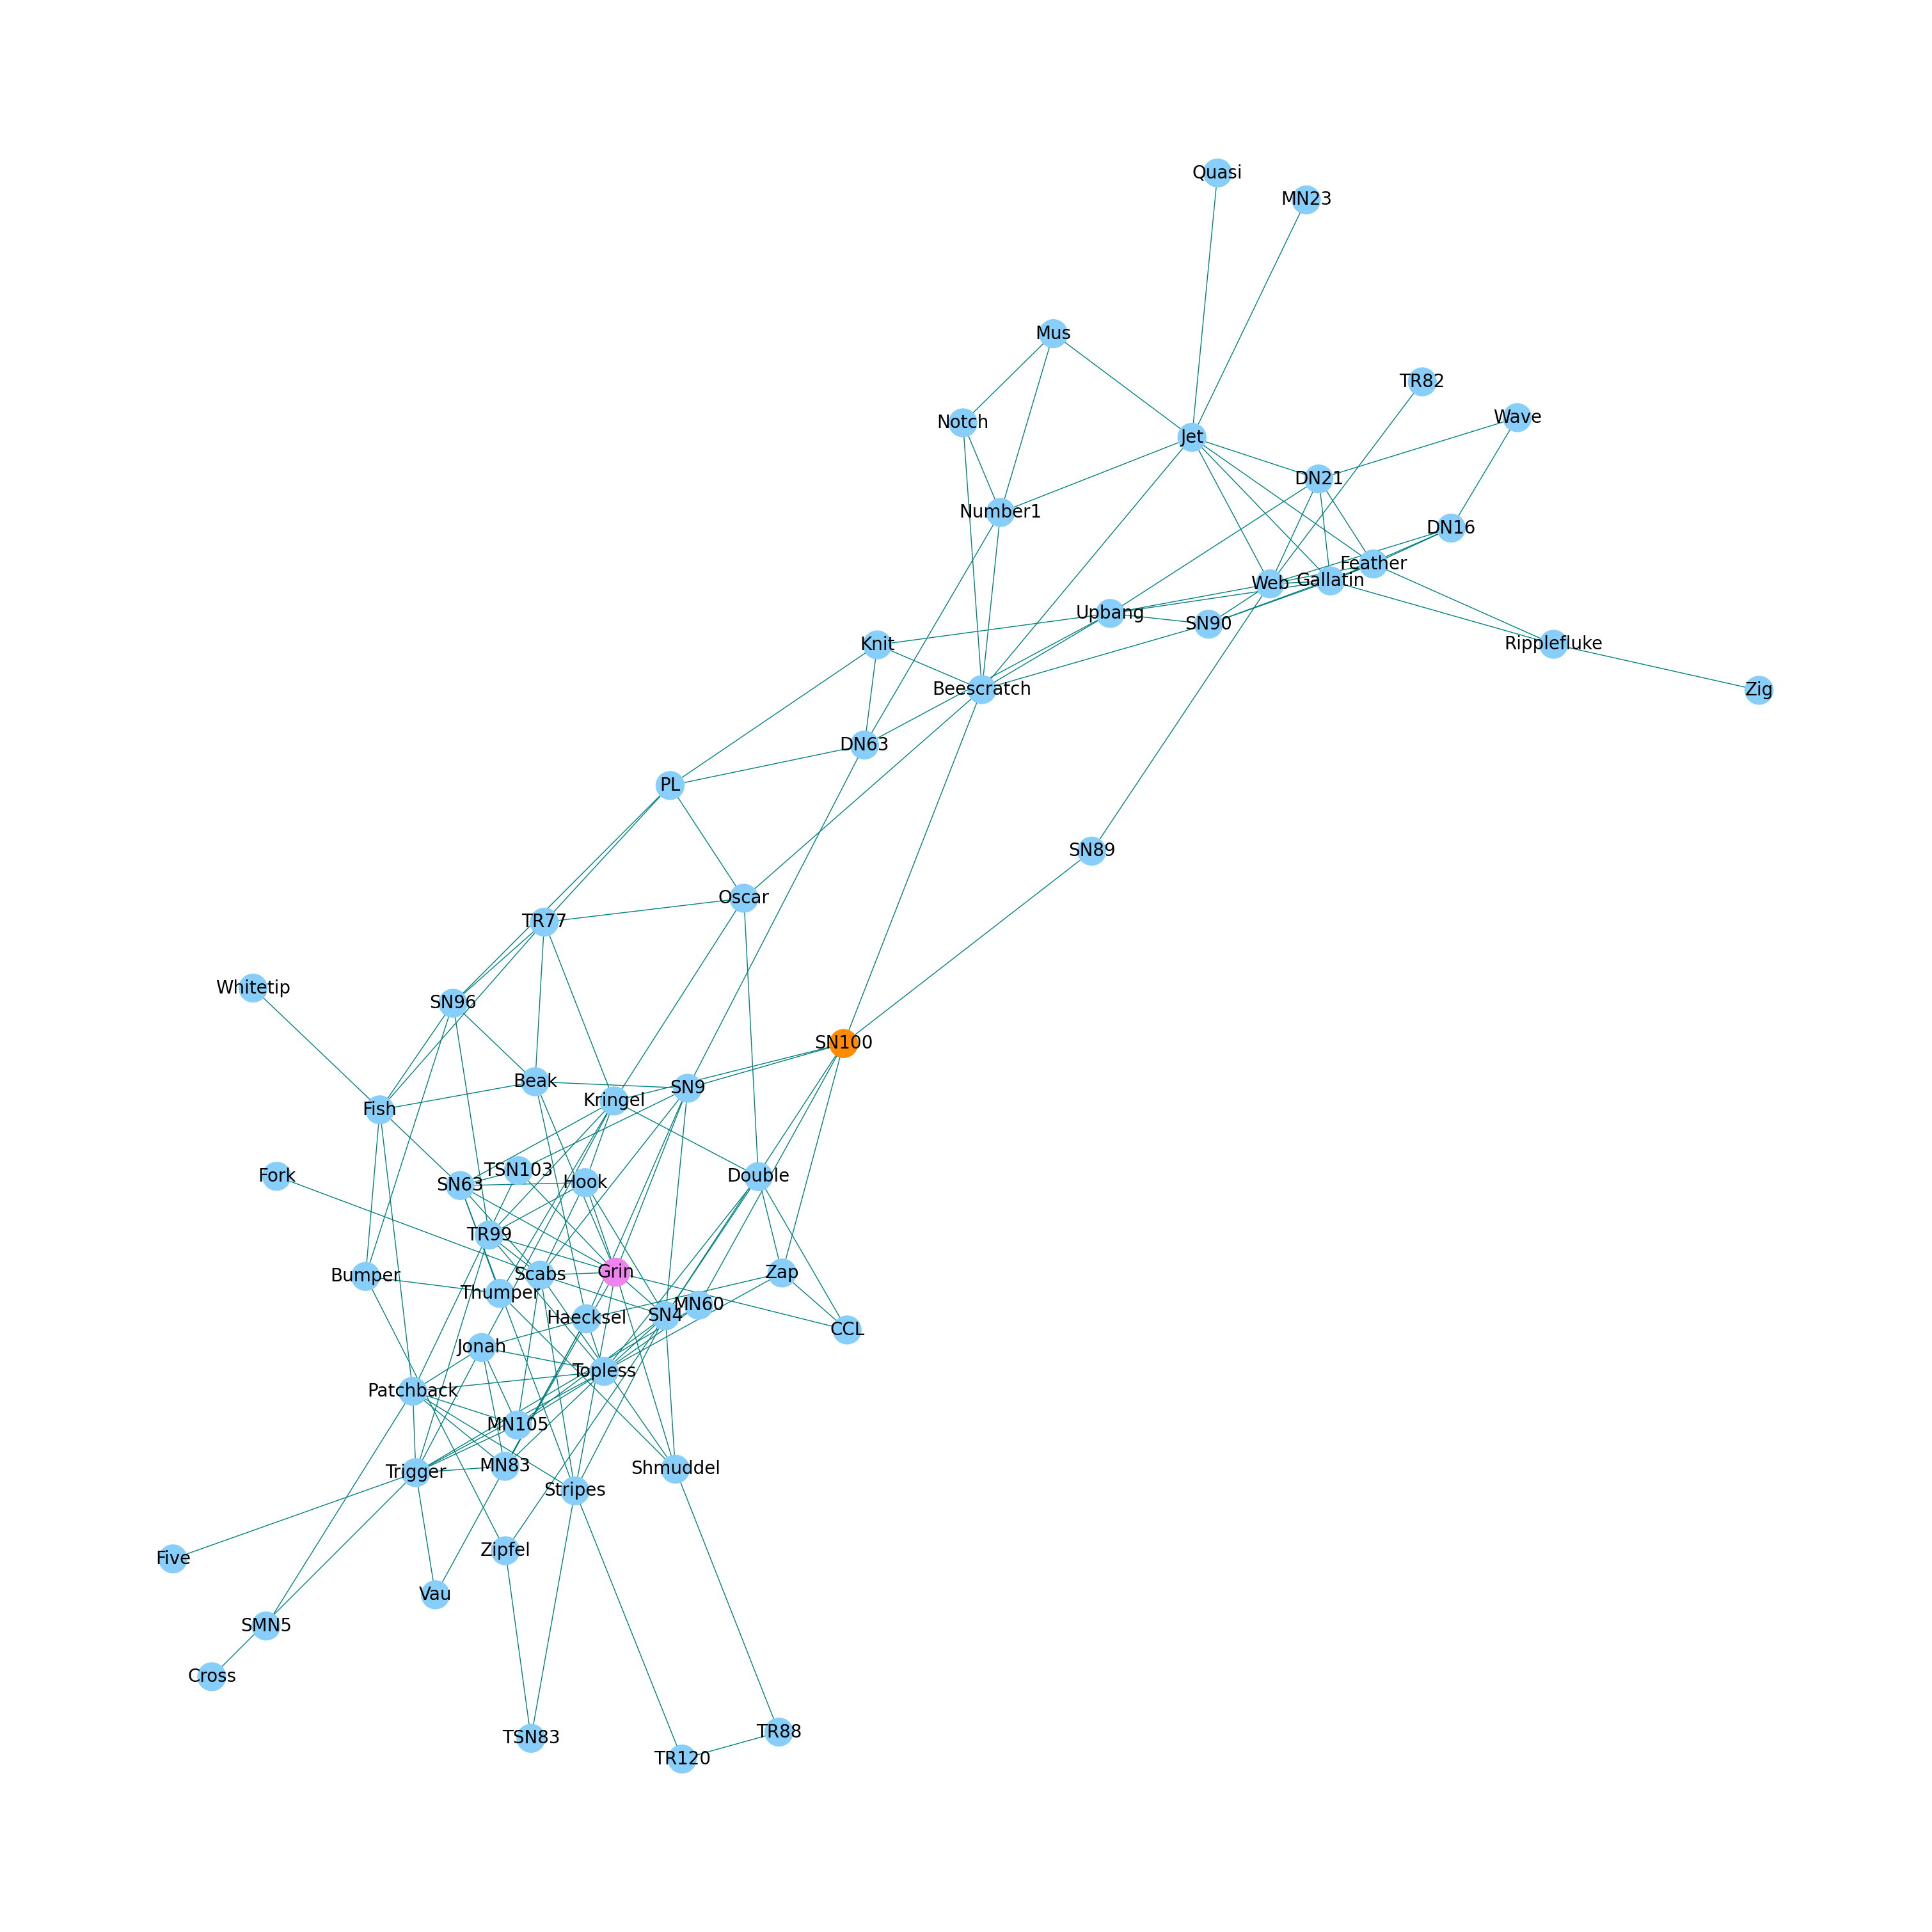

In [68]:
plt.figure(figsize = (30,30))
k_pos = nx.spring_layout(Dolphins_G, k=0.05)
colors = ['lightskyblue'] * len(Dolphins)
colors[14] = 'violet'
colors[36] = 'darkorange'
nx.draw(Dolphins_G, k_pos, node_color=colors, node_size=1000, edge_color='teal', with_labels=True, font_size=20)

## Do the centrality metrics identify different node(s) as the "most central"?
Yes, a dolphin named Grin has the highest degree centrality and the highest eigenvector centrality, while a dolphin named SN100 has the highest closeness centrality ad the highest betweenness centrality. 

## Given the context of your dataset, interpret which centrality metric you think is most informative. Explain.
Given the dataset, degree centrality is most informative. Specifically with this dolphin population in the Doubtful Sound, the dolphins rely on community structure and companionship. Degree centrality is based on the number of connections a specific node has, therefore illustrating the foundational aspect of the population.


In [32]:
i = 0
for node in Dolphins_G.nodes():
    print(i, node)
    i+=1

0 Beak
1 Beescratch
2 Bumper
3 CCL
4 Cross
5 DN16
6 DN21
7 DN63
8 Double
9 Feather
10 Fish
11 Five
12 Fork
13 Gallatin
14 Grin
15 Haecksel
16 Hook
17 Jet
18 Jonah
19 Knit
20 Kringel
21 MN105
22 MN23
23 MN60
24 MN83
25 Mus
26 Notch
27 Number1
28 Oscar
29 Patchback
30 PL
31 Quasi
32 Ripplefluke
33 Scabs
34 Shmuddel
35 SMN5
36 SN100
37 SN4
38 SN63
39 SN89
40 SN9
41 SN90
42 SN96
43 Stripes
44 Thumper
45 Topless
46 TR120
47 TR77
48 TR82
49 TR88
50 TR99
51 Trigger
52 TSN103
53 TSN83
54 Upbang
55 Vau
56 Wave
57 Web
58 Whitetip
59 Zap
60 Zig
61 Zipfel


In [30]:
# Girvan-Newman
from networkx.algorithms.community import girvan_newman
comm = girvan_newman(Dolphins_G)
gn_communities = tuple(sorted(c) for c in next(comm))


In [57]:
gn_communities

(['Beak',
  'Bumper',
  'CCL',
  'Cross',
  'Double',
  'Fish',
  'Five',
  'Fork',
  'Grin',
  'Haecksel',
  'Hook',
  'Jonah',
  'Kringel',
  'MN105',
  'MN60',
  'MN83',
  'Oscar',
  'PL',
  'Patchback',
  'SMN5',
  'SN100',
  'SN4',
  'SN63',
  'SN9',
  'SN96',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR120',
  'TR77',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Thumper',
  'Topless',
  'Trigger',
  'Vau',
  'Whitetip',
  'Zap',
  'Zipfel'],
 ['Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN89',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'])

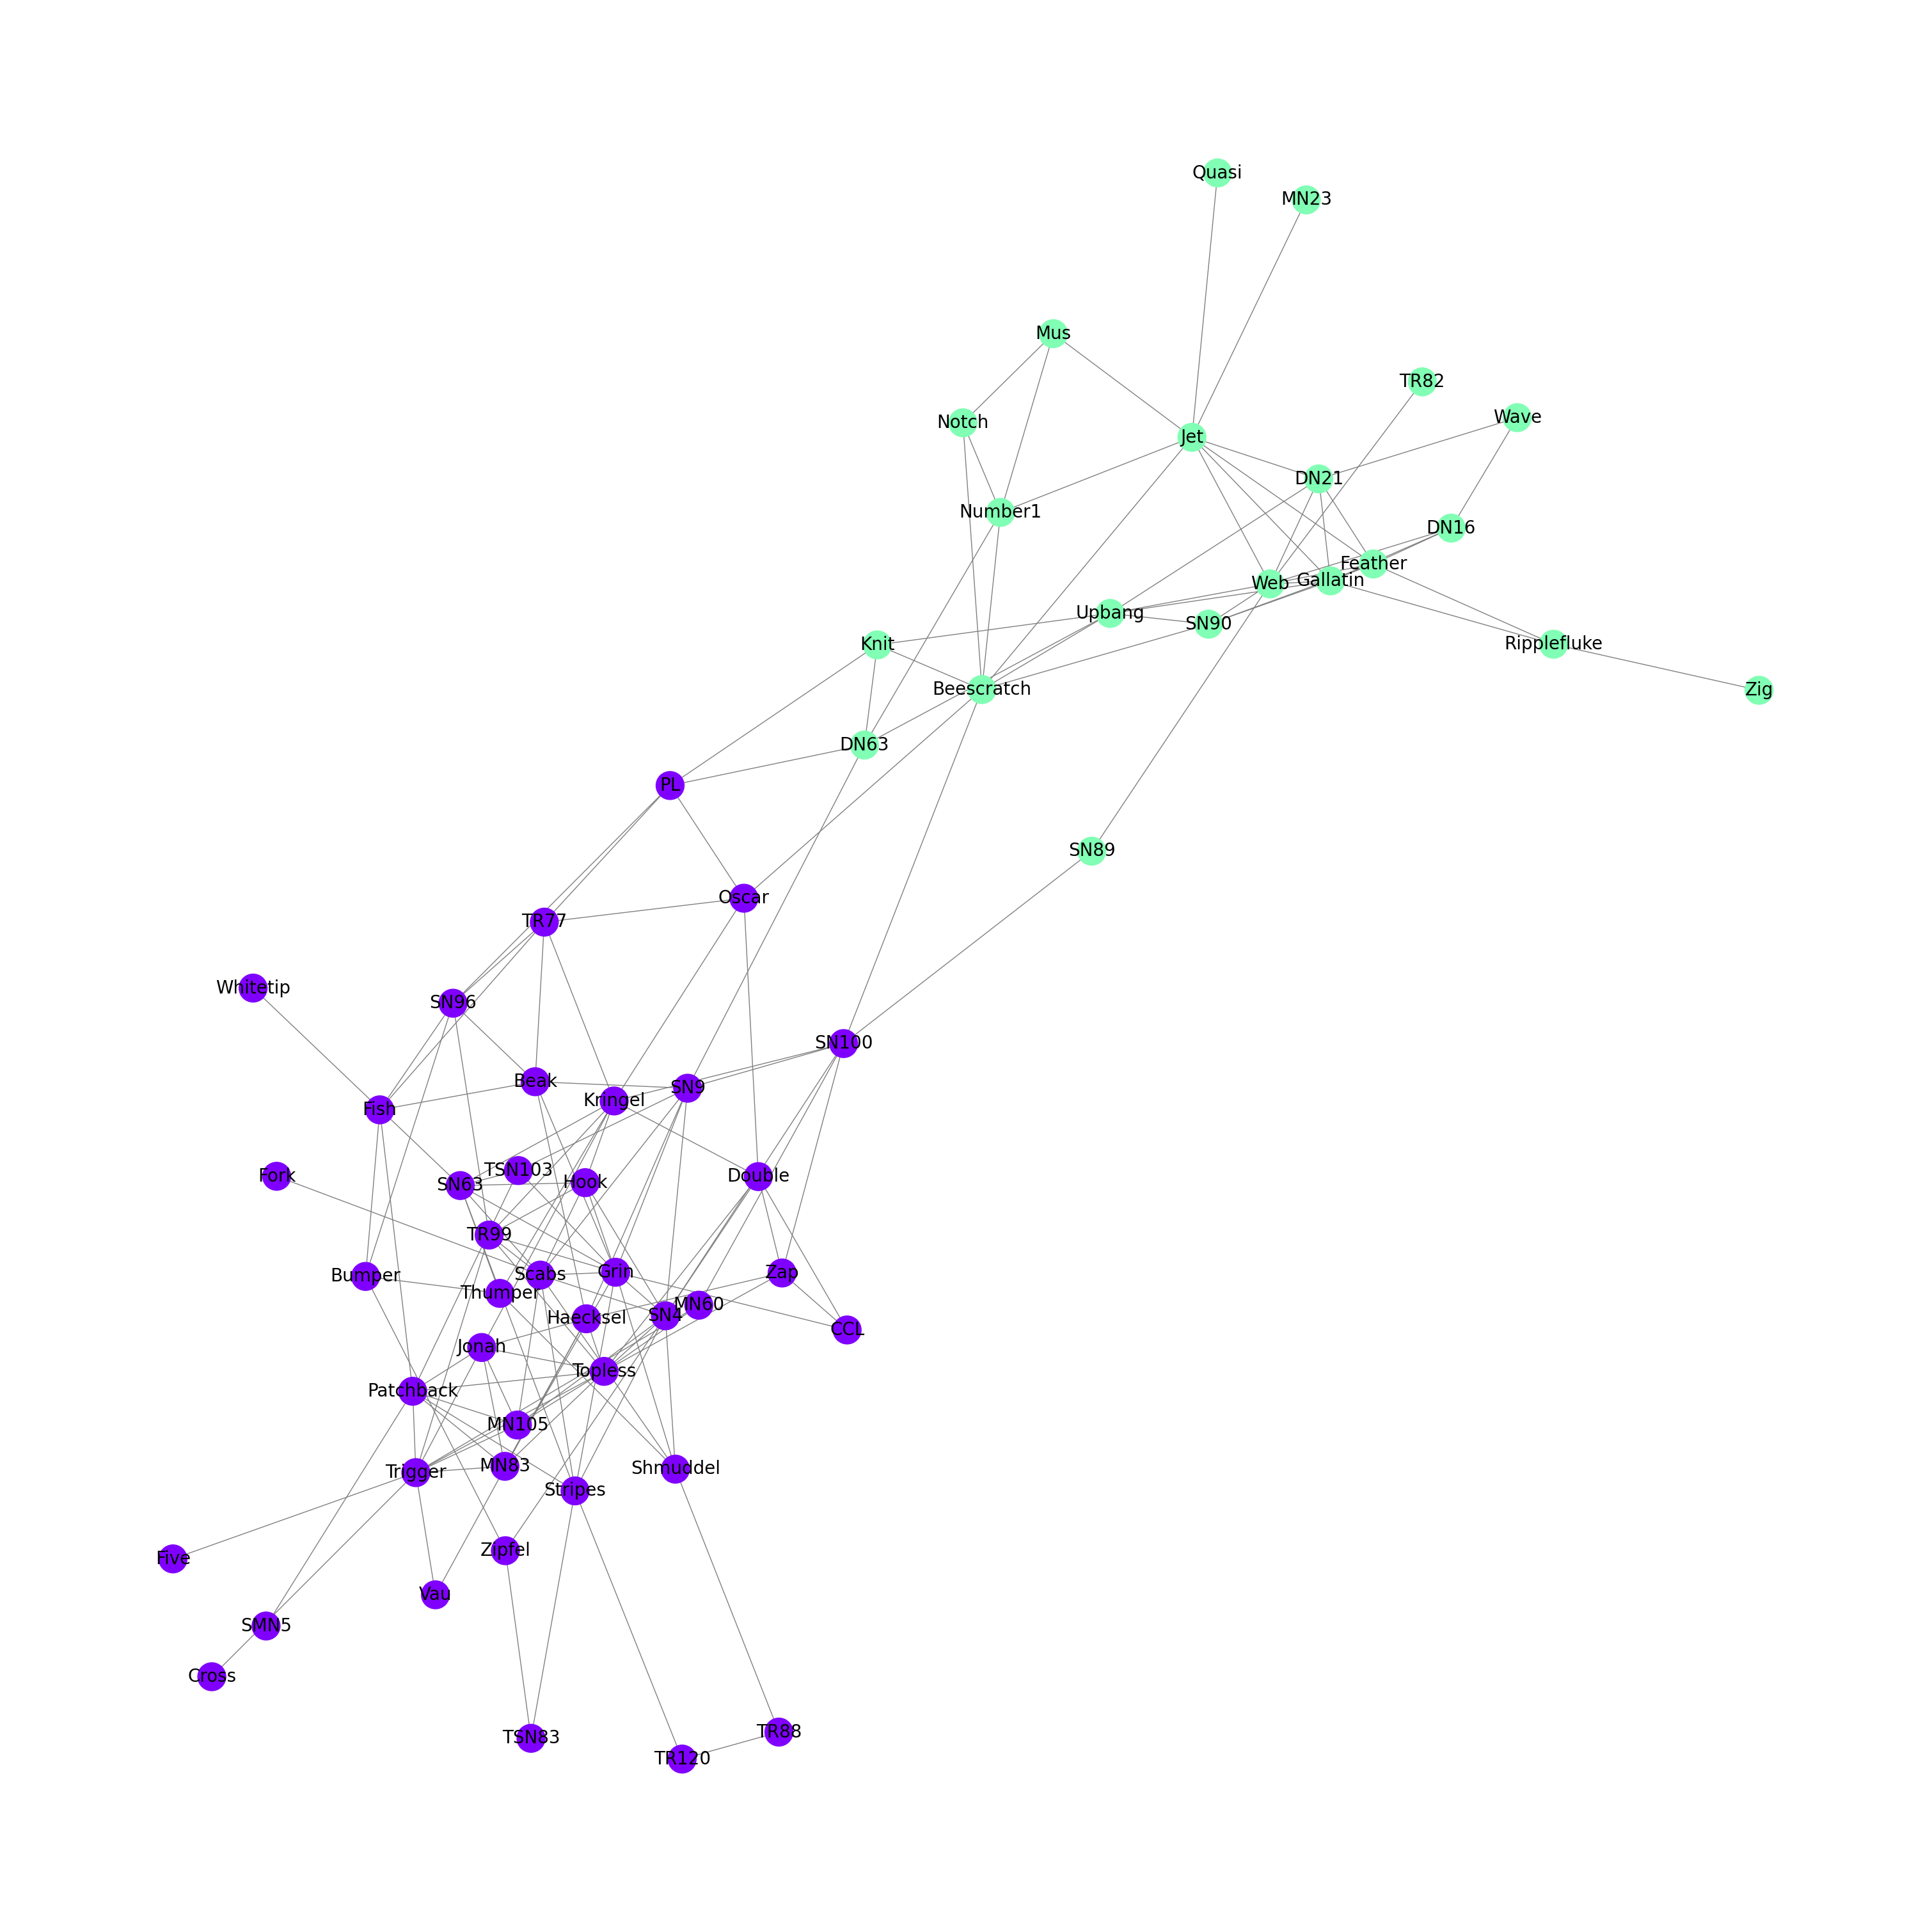

In [69]:
# Plot the commmunities
import matplotlib.cm as cmx
def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure(figsize = (30,30))
    nx.draw(Network, pos, node_color=color_map, node_size=1000, edge_color='grey', with_labels=True, font_size = 20)
    plt.show()
    return

gn_communities_num = switch_to_numbers(Dolphins_G, gn_communities)
Plot_Comm(Dolphins_G, gn_communities_num, k_pos)

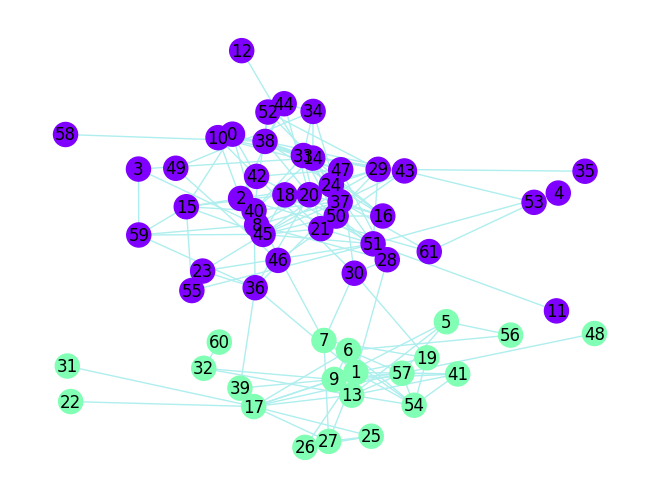

In [53]:
comm1 = girvan_newman(Dolphins_W1)
gn_communities1 = tuple(sorted(c) for c in next(comm1))
Plot_Comm(Dolphins_W1, gn_communities1)

## Do the identified communities make sense given the context of your data?
